# The Game of Thrones

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/game-of-thrones/character-predictions.csv
/kaggle/input/game-of-thrones/battles.csv
/kaggle/input/game-of-thrones/character-deaths.csv


In [2]:
battle = pd.read_csv('/kaggle/input/game-of-thrones/battles.csv')
battle.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [3]:
battle.shape

(38, 25)

In [4]:
battle.columns # the columns of the Dataset 

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

One of my favorite TV shows to have been watched is Game of thrones, i will excuse the awful ending of the show and the waste of characher developments and prophecies 


### Univariate Analysis 

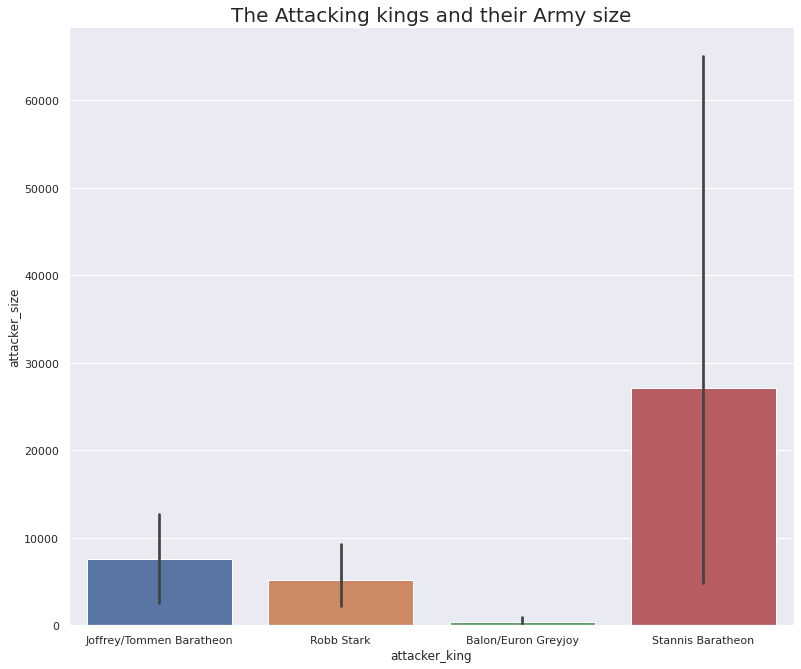

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(13,11)})
sns.barplot(x='attacker_king',y= 'attacker_size',data=battle)
plt.title('The Attacking kings and their Army size',fontsize=20)
plt.show()

From the this bachart, it is reviewed that Stannis Baratheon had the highest number of men,That means he would be a force to reckon with. Now for the rest of the Attacking kings, Euron Greyjoy has the smallest number of men and that's not the only small thing about this attacker. Despite, The size of his Army he still leads them into war, According Tho the books, the Overrulling kingdom was that of the Baratheons(Joffrey/Tommen) who are also Lannisters would be the kings expected to have the highest number of men due to their affliltion with the Lannisters. Robb Stark(The Young wolf ) Has not much men. Notice that the men of the North (Greyjoy anD Stark) have a small size in terms of army size.

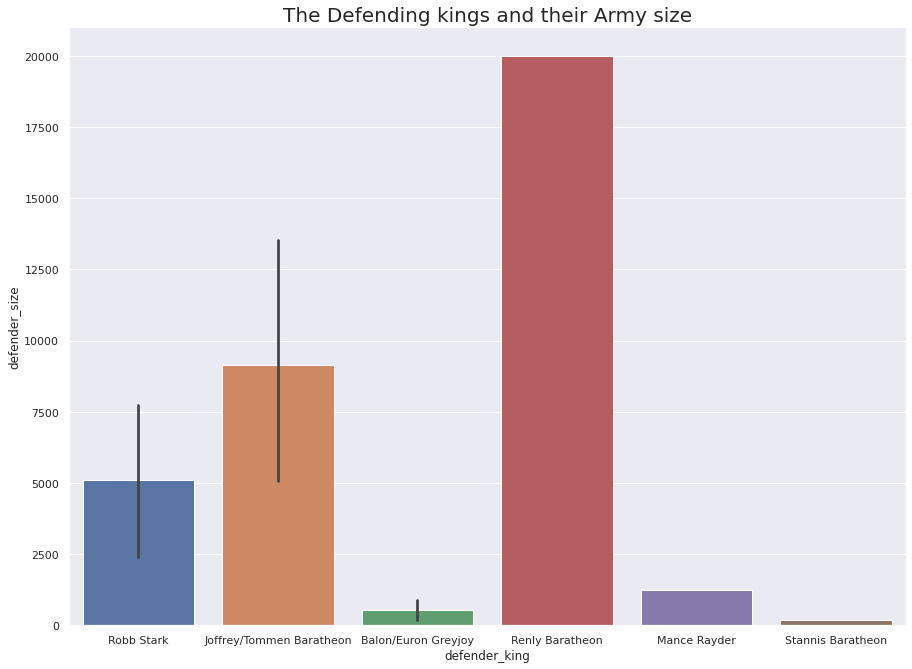

In [6]:
sns.set(rc={'figure.figsize':(15,11)})
sns.barplot(x='defender_king',y= 'defender_size',data=battle)
plt.title('The Defending kings and their Army size',fontsize=20)
plt.show()

In [7]:
battle.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

# The Strageties behind the Attacking Kings 's battles

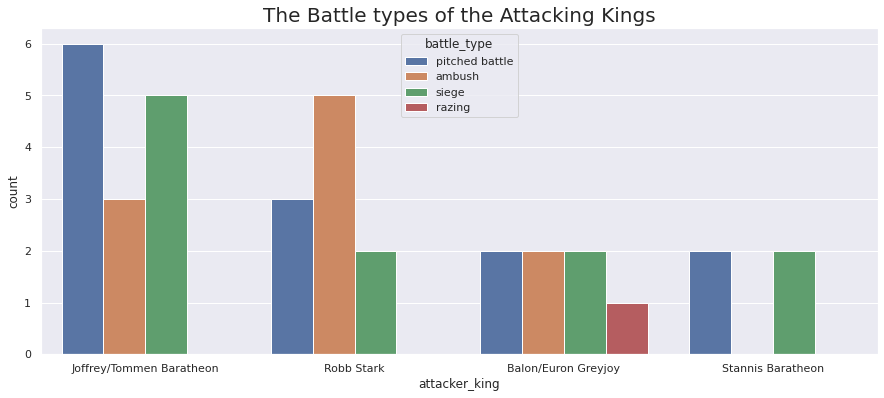

In [8]:

sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x='attacker_king',hue='battle_type',data=battle)
plt.title('The Battle types of the Attacking Kings',fontsize=20)
plt.show()

One thing in battles is having the  right army size and another thing is to have a plan or stragegy to know how to use them. For Joffrey/Tommen Baratheon they would most likely have a pitched battle twice as much as the other attacking kings.

>An ambush is a long-established military tactic in which combatants take advantage of concealment or the element of surprise to attack unsuspecting enemy combatants from concealed positions, such as among dense underbrush or behind hilltops


*Source:Wikipedia*


Joeffrey/Tommen Baratheon are not really the ambushing type unlike Robb Stark,Robb Stark's favourite battle type is  Ambushing. 

Joeffrey/Tommen Baratheon is 2 times more likely to use the seige battle type against its opponents.i.e he act or process of surrounding and attacking a fortified place in such a way as to isolate it from help and supplies.

Euron Greyjoy, although with a small army is only one that carried out razing battle type i.e destroyed and burned everything to the ground.

As for Stannis Baratheon, You would expect the Owner of the largest army to have one of best battle types and to have attacked alot of times.
 


In [9]:
# deaths = pd.read_csv('/kaggle/input/game-of-thrones/character-deaths.csv')
# deaths.head()